In [1]:
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir("/content/drive/My Drive")
with np.load('mpg_train_test.npz') as data:
  x_test = data['X_test.npy']
  x_train = data['X_train.npy']
  y_test = data['Y_test.npy']
  y_train = data['Y_train']

353554.86930919316
132730.3689150394
157867713.65878704
[ 4.32098745e+01 -1.42860003e-01  1.74115124e-04]
[ 5.97450584e+01 -5.06036607e-01  1.36639434e-03]
[ 6.40178386e+01 -1.91475523e-02  1.75185359e-06]
Relative Error (1, 2):  0.03405425932132592
Relative Error (2, 2):  0.03826392597838098
Relative Error (3, 2):  0.02878298424301775


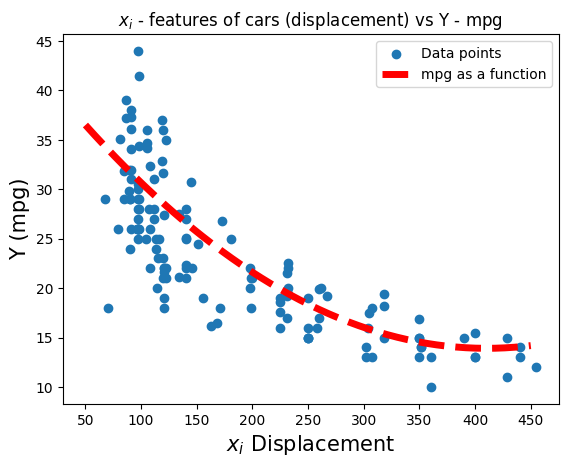

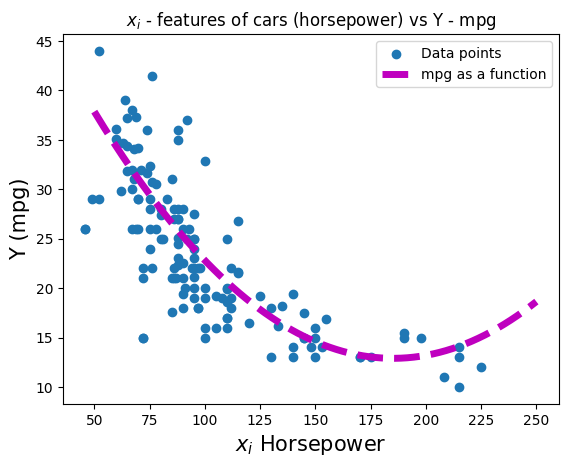

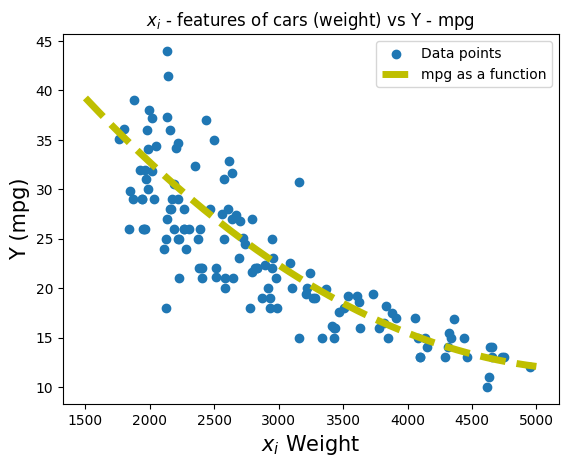

In [3]:
van_dis = np.vander(x_train[:, 0], 3, increasing = True)
van_hor = np.vander(x_train[:, 1], 3, increasing = True)
van_wei = np.vander(x_train[:, 2], 3, increasing = True)

def QR(V):
  A = np.append(np.ones((254, 1)), V[:, 1:3], axis = 1)
  print(np.linalg.cond(A))
  Q, R = np.linalg.qr(A)
  return np.linalg.solve(R, np.dot(Q.T, y_train))

theta_dis = QR(van_dis)
theta_hor = QR(van_hor)
theta_wei = QR(van_wei)

print(theta_dis)
print(theta_hor)
print(theta_wei)

def y(van, theta):
  return np.dot(van, theta)

y_dis = y(van_dis, theta_dis)
y_hor = y(van_hor, theta_hor)
y_wei = y(van_wei, theta_wei)

def RE(theta, index):
  coef = 1/np.linalg.norm(y_test)**2
  sum = 0
  x_test_i = np.vander(x_test[:, index], 3, increasing = True)
  y_re = y(x_test_i, theta)
  for j in range(138):
    sum = sum + abs(y_re[j] - y_test[j])**2
  return coef * sum

re_dis = RE(theta_dis, 0)
re_hor = RE(theta_hor, 1)
re_wei = RE(theta_wei, 2)

print("Relative Error (1, 2): ", re_dis)
print("Relative Error (2, 2): ", re_hor)
print("Relative Error (3, 2): ", re_wei)

y_test_dis = y(np.vander(np.linspace(50, 450, 138), 3, increasing = True), theta_dis)
y_test_hor = y(np.vander(np.linspace(50, 250, 138), 3, increasing = True), theta_hor)
y_test_wei = y(np.vander(np.linspace(1500, 5000, 138), 3, increasing = True), theta_wei)

plt_dis = plt.scatter(x_test[:, 0], y_test, label = 'Data points')
plt_dis = plt.plot(np.linspace(50, 450, 138), y_test_dis, 'r--', linewidth = 5, label = 'mpg as a function')
plt.xlabel('$x_{i}$ Displacement', fontsize = 15)
plt.ylabel('Y (mpg)', fontsize = 15)
plt.title('$x_{i}$ - features of cars (displacement) vs Y - mpg')
plt.legend()
plt.show()

plt_hor = plt.scatter(x_test[:, 1], y_test, label = 'Data points')
plt_hor = plt.plot(np.linspace(50, 250, 138), y_test_hor, 'm--', linewidth = 5, label = 'mpg as a function')
plt.xlabel('$x_{i}$ Horsepower', fontsize = 15)
plt.ylabel('Y (mpg)', fontsize = 15)
plt.title('$x_{i}$ - features of cars (horsepower) vs Y - mpg')
plt.legend()
plt.show()

plt_wei = plt.scatter(x_test[:, 2], y_test, label = 'Data points')
plt_wei = plt.plot(np.linspace(1500, 5000, 138), y_test_wei, 'y--', linewidth = 5, label = 'mpg as a function')
plt.xlabel('$x_{i}$ Weight', fontsize = 15)
plt.ylabel('Y (mpg)', fontsize = 15)
plt.title('$x_{i}$ - features of cars (weight) vs Y - mpg')
plt.legend()
plt.show()

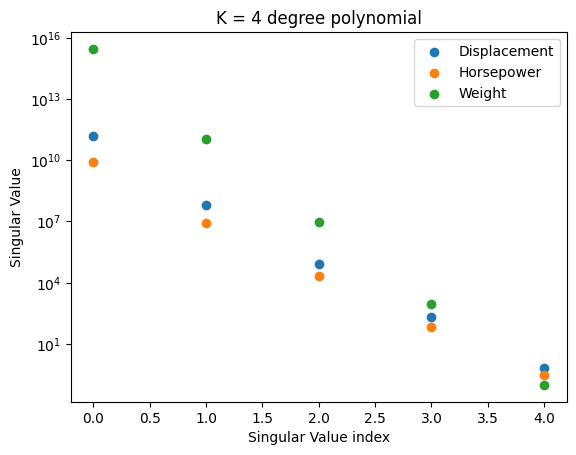

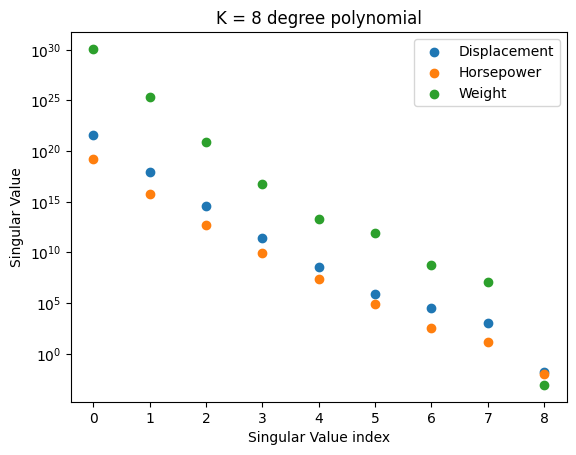

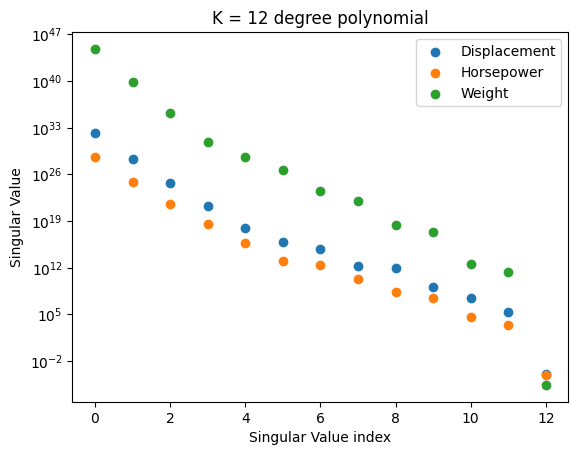

In [4]:
def van(K, index):
  return np.vander(x_train[:, index], K+1, increasing = True)

van_dis_K4 = van(4, 0)
van_dis_K8 = van(8, 0)
van_dis_K12 = van(12, 0)

van_hor_K4 = van(4, 1)
van_hor_K8 = van(8, 1)
van_hor_K12 = van(12, 1)

van_wei_K4 = van(4, 2)
van_wei_K8 = van(8, 2)
van_wei_K12 = van(12, 2)

def svd(V, K):
  A = np.append(np.ones((254, 1)), V[:, 1:K+1], axis = 1)
  U, S, Vh = np.linalg.svd(A)
  return S

s_dis_4 = svd(van_dis_K4, 4)
s_dis_8 = svd(van_dis_K8, 8)
s_dis_12 = svd(van_dis_K12, 12)

s_hor_4 = svd(van_hor_K4, 4)
s_hor_8 = svd(van_hor_K8, 8)
s_hor_12 = svd(van_hor_K12, 12)

s_wei_4 = svd(van_wei_K4, 4)
s_wei_8 = svd(van_wei_K8, 8)
s_wei_12 = svd(van_wei_K12, 12)

plt.yscale("log")
plt.scatter(np.linspace(0, 4, 5), s_dis_4, label = 'Displacement')
plt.scatter(np.linspace(0, 4, 5), s_hor_4, label = 'Horsepower')
plt.scatter(np.linspace(0, 4, 5), s_wei_4, label = 'Weight')
plt.xlabel('Singular Value index')
plt.ylabel('Singular Value')
plt.title('K = 4 degree polynomial')
plt.legend()
plt.show()

plt.yscale("log")
plt.scatter(np.linspace(0, 8, 9), s_dis_8, label = 'Displacement')
plt.scatter(np.linspace(0, 8, 9), s_hor_8, label = 'Horsepower')
plt.scatter(np.linspace(0, 8, 9), s_wei_8, label = 'Weight')
plt.xlabel('Singular Value index')
plt.ylabel('Singular Value')
plt.title('K = 8 degree polynomial')
plt.legend()
plt.show()

plt.yscale("log")
plt.scatter(np.linspace(0, 12, 13), s_dis_12, label = 'Displacement')
plt.scatter(np.linspace(0, 12, 13), s_hor_12, label = 'Horsepower')
plt.scatter(np.linspace(0, 12, 13), s_wei_12, label = 'Weight')
plt.xlabel('Singular Value index')
plt.ylabel('Singular Value')
plt.title('K = 12 degree polynomial')
plt.legend()
plt.show()

[ 4.48271600e+01 -1.72340205e-01  3.41807810e-04 -3.65583029e-07
  2.60062830e-10]
[-6.83141458e+02  3.08957625e+01 -5.43776530e-01  5.12279280e-03
 -2.84995319e-05  9.64598006e-08 -1.95064685e-10  2.16589067e-13
 -1.01548855e-16]
[ 6.67969175e+02 -9.95544083e+01  4.37209708e+00 -9.52978637e-02
  1.24001083e-03 -1.04959514e-05  6.03832589e-08 -2.40798216e-10
  6.66343293e-13 -1.25604534e-15  1.53885431e-18 -1.10492280e-21
  3.52870865e-25]
Relative Error K4:  0.03390446890850134
Relative Error K8:  0.03282877610876225
Relative Error K12:  0.0328732068023197


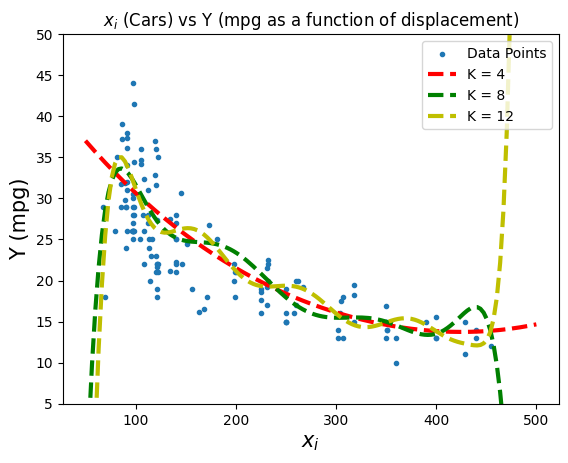

In [5]:
def van(K):
  return np.vander(x_train[:, 0], K+1, increasing = True)

van_dis_K4 = van(4)
van_dis_K8 = van(8)
van_dis_K12 = van(12)

def QR(V, K):
  A = np.append(np.ones((254, 1)), V[:, 1:K+1], axis = 1)
  Q, R = np.linalg.qr(A)
  return np.linalg.solve(R, np.dot(Q.T, y_train))

theta_dis_K4 = QR(van_dis_K4, 4)
theta_dis_K8 = QR(van_dis_K8, 8)
theta_dis_K12 = QR(van_dis_K12, 12)

print(theta_dis_K4)
print(theta_dis_K8)
print(theta_dis_K12)

def y(van, theta):
  return np.dot(van, theta)

y_dis_K4 = y(van_dis_K4, theta_dis_K4)
y_dis_K8 = y(van_dis_K8, theta_dis_K8)
y_dis_K12 = y(van_dis_K12, theta_dis_K12)

def RE(theta, index, K):
  coef = 1/np.linalg.norm(y_test)**2
  temp = 0
  sum = 0
  x_test_i = np.vander(x_test[:, index], K+1, increasing = True)
  y_re = y(x_test_i, theta)
  for j in range(138):
    sum = sum + abs(y_re[j] - y_test[j])**2
  return coef * sum

re_dis_K4 = RE(theta_dis_K4, 0, 4)
re_dis_K8 = RE(theta_dis_K8, 0, 8)
re_dis_K12 = RE(theta_dis_K12, 0, 12)

print("Relative Error K4: ", re_dis_K4)
print("Relative Error K8: ", re_dis_K8)
print("Relative Error K12: ", re_dis_K12)

def y_fun(K, theta):
  return y(np.vander(np.linspace(50, 500, 138), K+1, increasing = True), theta)

y_test_dis_K4 = y_fun(4, theta_dis_K4)
y_test_dis_K8 = y_fun(8, theta_dis_K8)
y_test_dis_K12 = y_fun(12, theta_dis_K12)

plt_dis = plt.scatter(x_test[:, 0], y_test, marker = '.', label = 'Data Points')
plt_dis_K4 = plt.plot(np.linspace(50, 500, 138), y_test_dis_K4, 'r--', linewidth = 3, label = 'K = 4')
plt_dis_K8 = plt.plot(np.linspace(50, 500, 138), y_test_dis_K8, 'g--', linewidth = 3, label = 'K = 8')
plt_dis_K12 = plt.plot(np.linspace(50, 500, 138), y_test_dis_K12, 'y--', linewidth = 3, label = 'K = 12')
plt.ylim(5, 50)
plt.xlabel('$x_{i}$', fontsize = 15)
plt.ylabel('Y (mpg)', fontsize = 15)
plt.title('$x_{i}$ (Cars) vs Y (mpg as a function of displacement)')
plt.legend(loc = 'upper right')
plt.show()

[ 7.33283856e+01 -9.32375285e-01  5.90599445e-03 -1.94881189e-05
  2.85451498e-08]
[ 1.10402480e+03 -8.36892472e+01  2.76373128e+00 -4.99681567e-02
  5.39522171e-04 -3.57117374e-06  1.42006870e-08 -3.11266624e-11
  2.88908637e-14]
[ 8.07695048e+04 -8.80316324e+03  4.29137242e+02 -1.23804065e+01
  2.35662695e-01 -3.12096192e-03  2.95079415e-05 -2.00813666e-07
  9.76824392e-10 -3.31403110e-12  7.44771278e-15 -9.96054940e-18
  5.99891403e-21]
Relative Error K4:  0.03917194030765126
Relative Error K8:  0.03894006416716872
Relative Error K12:  0.06231394213761363


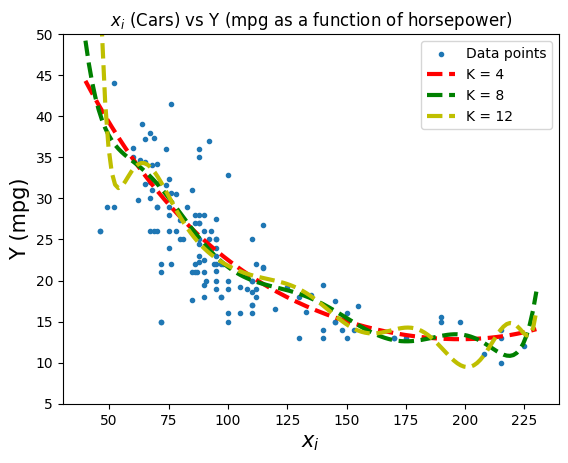

In [6]:
def van(K):
  return np.vander(x_train[:, 1], K+1, increasing = True)

van_hor_K4 = van(4)
van_hor_K8 = van(8)
van_hor_K12 = van(12)

def QR(V, K):
  A = np.append(np.ones((254, 1)), V[:, 1:K+1], axis = 1)
  Q, R = np.linalg.qr(A)
  return np.linalg.solve(R, np.dot(Q.T, y_train))

theta_hor_K4 = QR(van_hor_K4, 4)
theta_hor_K8 = QR(van_hor_K8, 8)
theta_hor_K12 = QR(van_hor_K12, 12)

print(theta_hor_K4)
print(theta_hor_K8)
print(theta_hor_K12)

def y(van, theta):
  return np.dot(van, theta)

y_hor_K4 = y(van_hor_K4, theta_hor_K4)
y_hor_K8 = y(van_hor_K8, theta_hor_K8)
y_hor_K12 = y(van_hor_K12, theta_hor_K12)

def RE(theta, index, K):
  coef = 1/np.linalg.norm(y_test)**2
  sum = 0
  x_test_i = np.vander(x_test[:, index], K+1, increasing = True)
  y_re = y(x_test_i, theta)
  for j in range(138):
    sum = sum + abs(y_re[j] - y_test[j])**2
  return coef * sum

re_hor_K4 = RE(theta_hor_K4, 1, 4)
re_hor_K8 = RE(theta_hor_K8, 1, 8)
re_hor_K12 = RE(theta_hor_K12, 1, 12)

print("Relative Error K4: ", re_hor_K4)
print("Relative Error K8: ", re_hor_K8)
print("Relative Error K12: ", re_hor_K12)

def y_fun(K, theta):
  return y(np.vander(np.linspace(40, 230, 138), K+1, increasing = True), theta)

y_test_hor_K4 = y_fun(4, theta_hor_K4)
y_test_hor_K8 = y_fun(8, theta_hor_K8)
y_test_hor_K12 = y_fun(12, theta_hor_K12)

plt_hor = plt.scatter(x_test[:, 1], y_test, marker = '.', label = 'Data points')
plt_hor_K4 = plt.plot(np.linspace(40, 230, 138), y_test_hor_K4, 'r--', linewidth = 3, label = 'K = 4')
plt_hor_K8 = plt.plot(np.linspace(40, 230, 138), y_test_hor_K8, 'g--', linewidth = 3, label = 'K = 8')
plt_hor_K12 = plt.plot(np.linspace(40, 230, 138), y_test_hor_K12, 'y--', linewidth = 3, label = 'K = 12')
plt.ylim(5, 50)
plt.xlabel('$x_{i}$', fontsize = 15)
plt.ylabel('Y (mpg)', fontsize = 15)
plt.title('$x_{i}$ (Cars) vs Y (mpg as a function of horsepower)')
plt.legend()
plt.show()

[ 3.79745476e+01  1.52452574e-02 -1.46067960e-05  3.32892064e-09
 -2.45360967e-13]
[-4.23792757e+03  1.01419477e+01 -1.01217384e-02  5.54212594e-06
 -1.81591028e-09  3.62101743e-13 -4.23691709e-17  2.59259652e-21
 -5.97372982e-26]
[ 7.94790761e+05 -3.06960232e+03  5.33541007e+00 -5.52098127e-03
  3.78991218e-06 -1.81913107e-09  6.26374076e-13 -1.55967670e-16
  2.78862994e-20 -3.49301970e-24  2.91071462e-28 -1.44925682e-32
  3.26156370e-37]
Relative Error K4:  0.0287925183579924
Relative Error K8:  0.029780226573991278
Relative Error K12:  0.030472239477300822


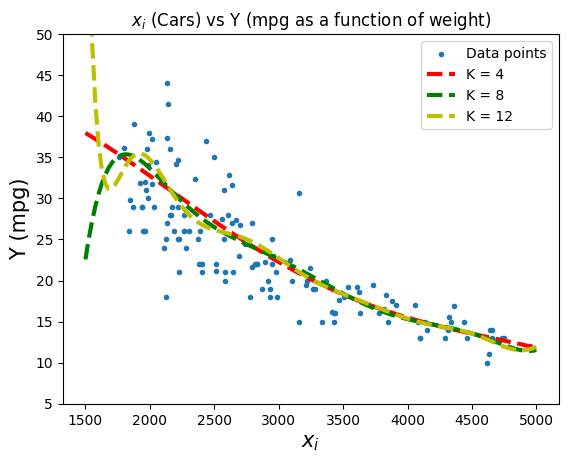

In [7]:
def van(K):
  return np.vander(x_train[:, 2], K+1, increasing = True)

van_wei_K4 = van(4)
van_wei_K8 = van(8)
van_wei_K12 = van(12)

def QR(V, K):
  A = np.append(np.ones((254, 1)), V[:, 1:K+1], axis = 1)
  Q, R = np.linalg.qr(A)
  return np.linalg.solve(R, np.dot(Q.T, y_train))

theta_wei_K4 = QR(van_wei_K4, 4)
theta_wei_K8 = QR(van_wei_K8, 8)
theta_wei_K12 = QR(van_wei_K12, 12)

print(theta_wei_K4)
print(theta_wei_K8)
print(theta_wei_K12)

def y(van, theta):
  return np.dot(van, theta)

y_wei_K4 = y(van_wei_K4, theta_wei_K4)
y_wei_K8 = y(van_wei_K8, theta_wei_K8)
y_wei_K12 = y(van_wei_K12, theta_wei_K12)

def RE(theta, index, K):
  coef = 1/np.linalg.norm(y_test)**2
  sum = 0
  x_test_i = np.vander(x_test[:, index], K+1, increasing = True)
  y_re = y(x_test_i, theta)
  for j in range(138):
    sum = sum + abs(y_re[j] - y_test[j])**2
  return coef * sum

re_wei_K4 = RE(theta_wei_K4, 2, 4)
re_wei_K8 = RE(theta_wei_K8, 2, 8)
re_wei_K12 = RE(theta_wei_K12, 2, 12)

print("Relative Error K4: ", re_wei_K4)
print("Relative Error K8: ", re_wei_K8)
print("Relative Error K12: ", re_wei_K12)

def y_fun(K, theta):
  return y(np.vander(np.linspace(1500, 5000, 138), K+1, increasing = True), theta)

y_test_wei_K4 = y_fun(4, theta_wei_K4)
y_test_wei_K8 = y_fun(8, theta_wei_K8)
y_test_wei_K12 = y_fun(12, theta_wei_K12)

plt_wei = plt.scatter(x_test[:, 2], y_test, marker = '.', label = 'Data points')
plt_wei_K4 = plt.plot(np.linspace(1500, 5000, 138), y_test_wei_K4, 'r--', linewidth = 3, label = 'K = 4')
plt_wei_K8 = plt.plot(np.linspace(1500, 5000, 138), y_test_wei_K8, 'g--', linewidth = 3, label = 'K = 8')
plt_wei_K12 = plt.plot(np.linspace(1500, 5000, 138), y_test_wei_K12, 'y--', linewidth = 3, label = 'K = 12')
plt.ylim(5, 50)
plt.xlabel('$x_{i}$', fontsize = 15)
plt.ylabel('Y (mpg)', fontsize = 15)
plt.title('$x_{i}$ (Cars) vs Y (mpg as a function of weight)')
plt.legend()
plt.show()

In [8]:
def A_mt(index1, index2, data):
  index1 = index1 - 1
  index2 = index2 - 1
  A = np.zeros((len(data), 6))
  temp = np.ones((len(data), 1))
  A[:, 0] = temp[:, 0]
  A[:, 1] = data[:, index1]
  A[:, 2] = data[:, index2]
  A[:, 3] = data[:, index1] * data[:, index2]
  A[:, 4] = data[:, index1] ** 2
  A[:, 5] = data[:, index2] ** 2
  return A

A_12 = A_mt(1, 2, x_train)
A_13 = A_mt(1, 3, x_train)
A_23 = A_mt(2, 3, x_train)

def QR(A, index1, index2, data):
  index1 = index1 - 1
  index2 = index2 - 1
  Q, R = np.linalg.qr(A)
  return np.linalg.solve(R, np.dot(Q.T, data))

theta_12 = QR(A_12, 1, 2, y_train)
theta_13 = QR(A_13, 1, 3, y_train)
theta_23 = QR(A_23, 2, 3, y_train)

print('theta (1,2): ', theta_12)
print('theta (1,3): ', theta_13)
print('theta (2,3): ', theta_23)

y_12 = np.dot(A_mt(1, 2, x_test), theta_12)
y_13 = np.dot(A_mt(1, 3, x_test), theta_13)
y_23 = np.dot(A_mt(2, 3, x_test), theta_23)

def RE(y, A, theta):
  coef = 1/np.linalg.norm(y_test)**2
  sum = 0
  for j in range(138):
    sum = sum + abs(y[j] - y_test[j])**2
  return coef *sum

print("Relative Error (1, 2): ", RE(y_12, A_12, theta_12))
print("Relative Error (1, 3): ", RE(y_13, A_13, theta_13))
print("Relative Error (2, 3): ", RE(y_23, A_23, theta_23))

theta (1,2):  [ 5.53738400e+01 -9.90147708e-02 -2.63354790e-01  3.32863972e-04
  7.16727271e-05  3.09346246e-04]
theta (1,3):  [ 5.21724472e+01 -1.02841663e-01 -5.96527372e-03  2.56217276e-05
 -1.23292404e-05 -7.20135816e-07]
theta (2,3):  [ 6.60015548e+01 -3.31897319e-01 -9.10671879e-03  3.20696068e-05
  5.36520109e-04  2.19102267e-07]
Relative Error (1, 2):  0.030693478909336172
Relative Error (1, 3):  0.029092524377644605
Relative Error (2, 3):  0.030684834761041505


In [9]:
A = np.zeros((254, 7))
temp = np.ones((254, 1))
A[:, 0] = temp[:, 0]
A[:, 1] = x_train[:, 0]
A[:, 2] = x_train[:, 1]
A[:, 3] = x_train[:, 2]
A[:, 4] = x_train[:, 0] ** 2
A[:, 5] = x_train[:, 1] ** 2
A[:, 6] = x_train[:, 2] ** 2

Q, R = np.linalg.qr(A)
theta = np.linalg.solve(R, np.dot(Q.T, y_train))

print('theta (1,2,3): ', theta)
print(theta)

A = np.zeros((138, 7))
temp = np.ones((138, 1))
A[:, 0] = temp[:, 0]
A[:, 1] = x_test[:, 0]
A[:, 2] = x_test[:, 1]
A[:, 3] = x_test[:, 2]
A[:, 4] = x_test[:, 0] ** 2
A[:, 5] = x_test[:, 1] ** 2
A[:, 6] = x_test[:, 2] ** 2
y = np.dot(A, theta)

coef = 1/np.linalg.norm(y_test)**2
sum = 0
for j in range(138):
  sum = sum + abs(y[j] - y_test[j])**2
print("Relative Error (1, 2, 3): ", coef *sum)

theta (1,2,3):  [ 6.10898681e+01 -5.15358658e-02 -2.53595703e-01 -6.04824989e-03
  9.00595637e-05  6.41569956e-04  5.17132193e-07]
[ 6.10898681e+01 -5.15358658e-02 -2.53595703e-01 -6.04824989e-03
  9.00595637e-05  6.41569956e-04  5.17132193e-07]
Relative Error (1, 2, 3):  0.03010535672479519
